# Data Cleaning

## Import Library

In [1309]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import sklearn as sk

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [1310]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1311]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)
print('Scikit-Learn', sk.__version__)

NumPy 1.23.5
Pandas 2.0.1
Matplotlib 3.7.1
Seaborn 0.12.2
Scikit-Learn 1.2.2


## Read Dataset

In [1312]:
customer = pd.read_csv('https://raw.githubusercontent.com/sabirinID/Kalbe-Nutritionals-Data-Science/main/Dataset/Case%20Study%20-%20Customer.csv', sep=';')
product = pd.read_csv('https://raw.githubusercontent.com/sabirinID/Kalbe-Nutritionals-Data-Science/main/Dataset/Case%20Study%20-%20Product.csv', sep=';')
store = pd.read_csv('https://raw.githubusercontent.com/sabirinID/Kalbe-Nutritionals-Data-Science/main/Dataset/Case%20Study%20-%20Store.csv', sep=';')
transaction = pd.read_csv('https://raw.githubusercontent.com/sabirinID/Kalbe-Nutritionals-Data-Science/main/Dataset/Case%20Study%20-%20Transaction.csv', sep=';')

In [1313]:
# Define function
def missing_values(df):
    total = df.isna().sum()
    percent = round((df.isna().sum() / df.isna().count() * 100), 2)
    na = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage (%)'])
    na = na[na['Percentage (%)'] > 0]
    na.reset_index(inplace=True)
    na.rename(columns={'index': 'Feature Name'}, inplace=True)
    return na

def unique_values(df):
    values = {'Feature Name': [], 'Unique Classes': []}
    for col in df.columns:
        values['Feature Name'].append(col)
        values['Unique Classes'].append(df[col].unique())
    return pd.DataFrame(values)

def categorical_distribution(cat):
    count = cat.describe().loc['count']
    top_freq = cat.describe().loc['freq']

    percentage = (top_freq / count) * 100
    percentage = percentage.astype(float)

    result = pd.concat([cat.describe().loc['top'], percentage], axis=1)
    result.columns = ['Top most frequent class', 'Percentage (%)']
    
    return result.round(2).reset_index().rename(columns={'index': 'Feature Name'})

### Customer

In [1314]:
df_c = customer.copy()
df_c.sample(5)

,CustomerID,Age,Gender,Marital Status,Income
363,364,27,1,Married,"3,41"
324,325,37,0,Single,"3,25"
35,36,32,1,Married,"10,4"
200,201,57,0,Married,"6,87"
54,55,34,1,Married,"8,44"


In [1315]:
df_c.shape

(447, 5)

In [1316]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [1317]:
# Check the features that have duplicate values
print(df_c.duplicated().any())
df_c.duplicated().sum()

False


0

In [1318]:
# Check the features that have missing values
print(df_c.isna().values.any())
missing_values(df_c)

True


,Feature Name,Total,Percentage (%)
0,Marital Status,3,0.67


In [1319]:
print(df_c.columns)
unique_values(df_c)

Index(['CustomerID', 'Age', 'Gender', 'Marital Status', 'Income'], dtype='object')


,Feature Name,Unique Classes
0,CustomerID,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Age,"[55, 60, 32, 31, 58, 23, 37, 33, 34, 42, 2, 30..."
2,Gender,"[1, 0]"
3,Marital Status,"[Married, nan, Single]"
4,Income,"[5,12, 6,23, 9,17, 4,87, 3,57, 2,33, 4,57, 5,4..."


In [1320]:
# Define the feature
cat = df_c.select_dtypes(include=['object'])
num = df_c.select_dtypes(exclude=['object'])

cat_cols = cat.columns
num_cols = num.columns

print(f'Jumlah fitur kategorikal: {cat.shape[1]}')
print(f'Jumlah fitur numerikal  : {num.shape[1]}')

Jumlah fitur kategorikal: 2
Jumlah fitur numerikal  : 3


In [1321]:
df_c.describe(include='all')

,CustomerID,Age,Gender,Marital Status,Income
count,447.000000,447.000000,447.000000,444,447
unique,NaN,NaN,NaN,2,369
top,NaN,NaN,NaN,Married,0
freq,NaN,NaN,NaN,340,16
mean,224.000000,39.782998,0.458613,NaN,NaN
std,129.182042,12.848719,0.498842,NaN,NaN
min,1.000000,0.000000,0.000000,NaN,NaN
25%,112.500000,30.000000,0.000000,NaN,NaN
50%,224.000000,39.000000,0.000000,NaN,NaN
75%,335.500000,50.500000,1.000000,NaN,NaN


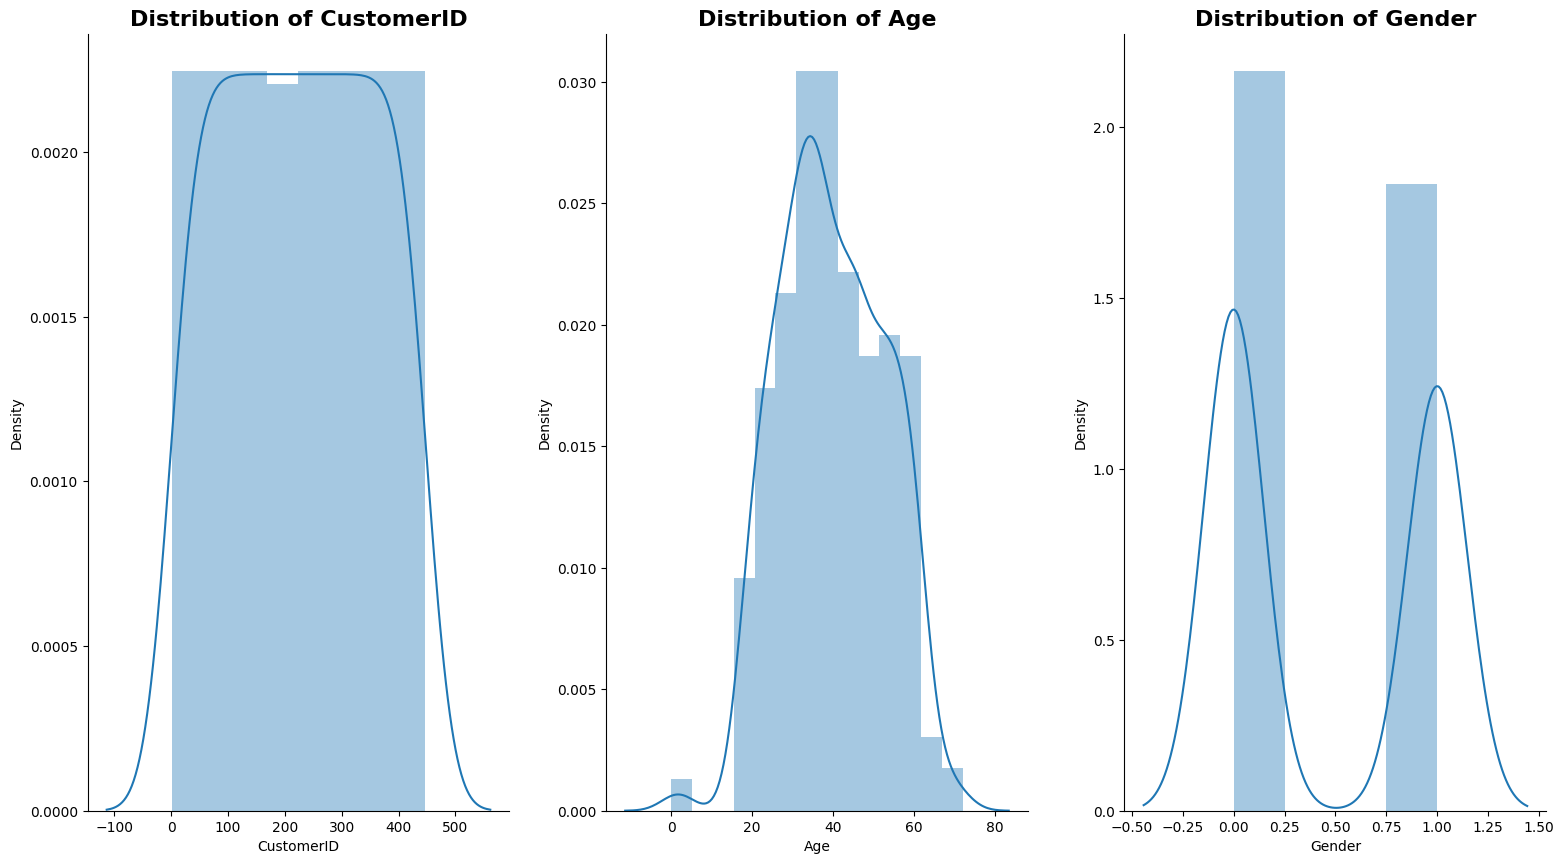

In [1322]:
plt.figure(figsize=(16, 9))
for i in range(0, len(num_cols)):
    plt.subplot(1, 3, i+1)
    sns.distplot(df_c[num_cols[i]], color='tab:blue')
    sns.despine()
    plt.title(f'Distribution of {num_cols[i]}', fontsize=16, weight='bold')
    plt.tight_layout(pad=2)

plt.show()

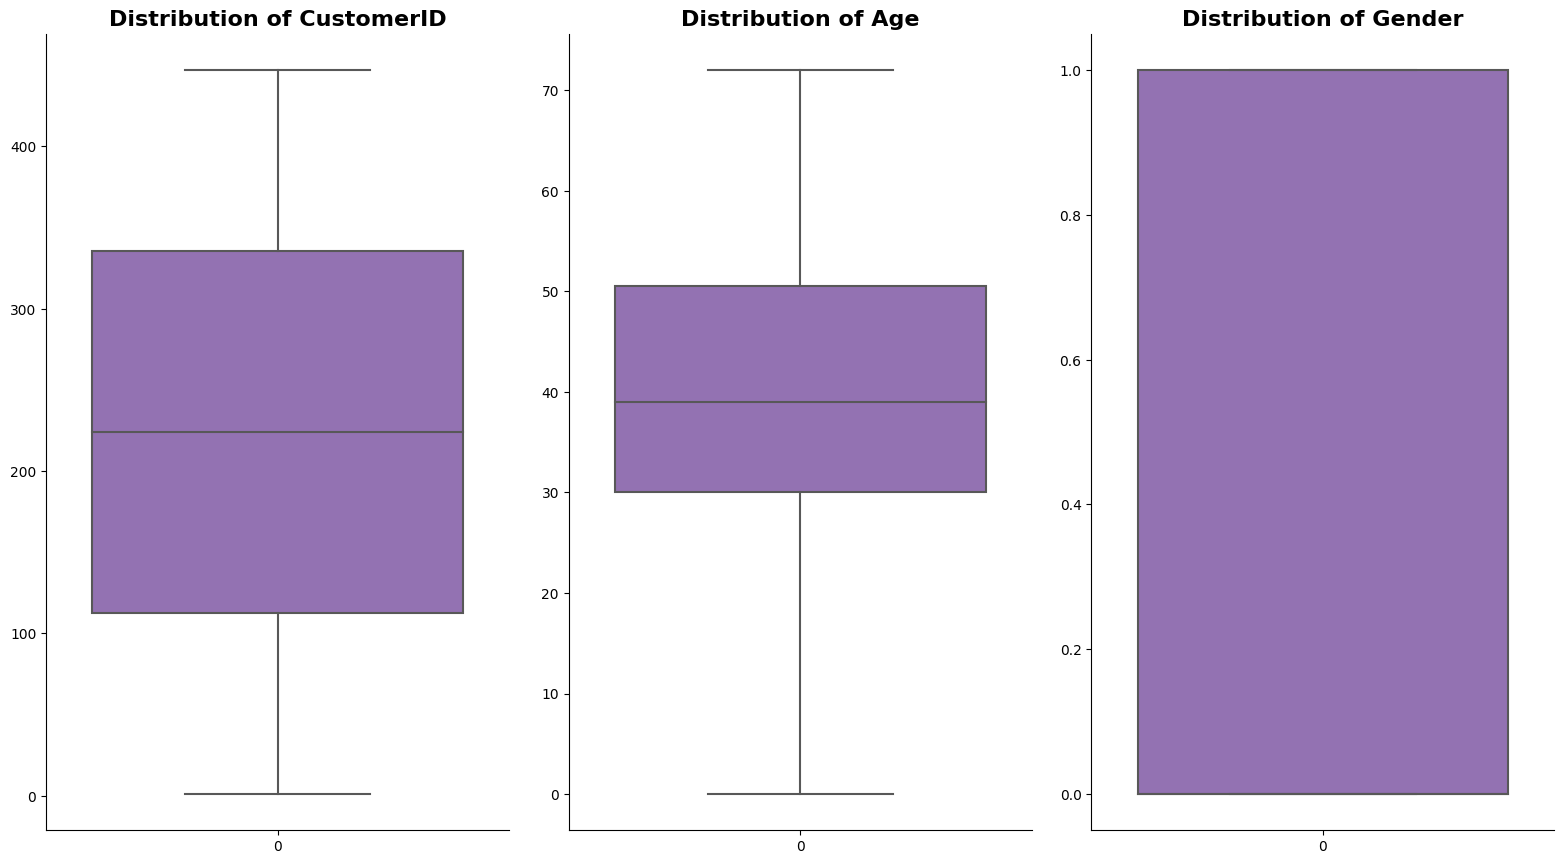

In [1323]:
plt.figure(figsize=(16, 9))
for i in range(0, len(num_cols)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(df_c[num_cols[i]], color='tab:purple')
    sns.despine()
    plt.title(f'Distribution of {num_cols[i]}', fontsize=16, weight='bold')
    plt.tight_layout(pad=2)

plt.show()

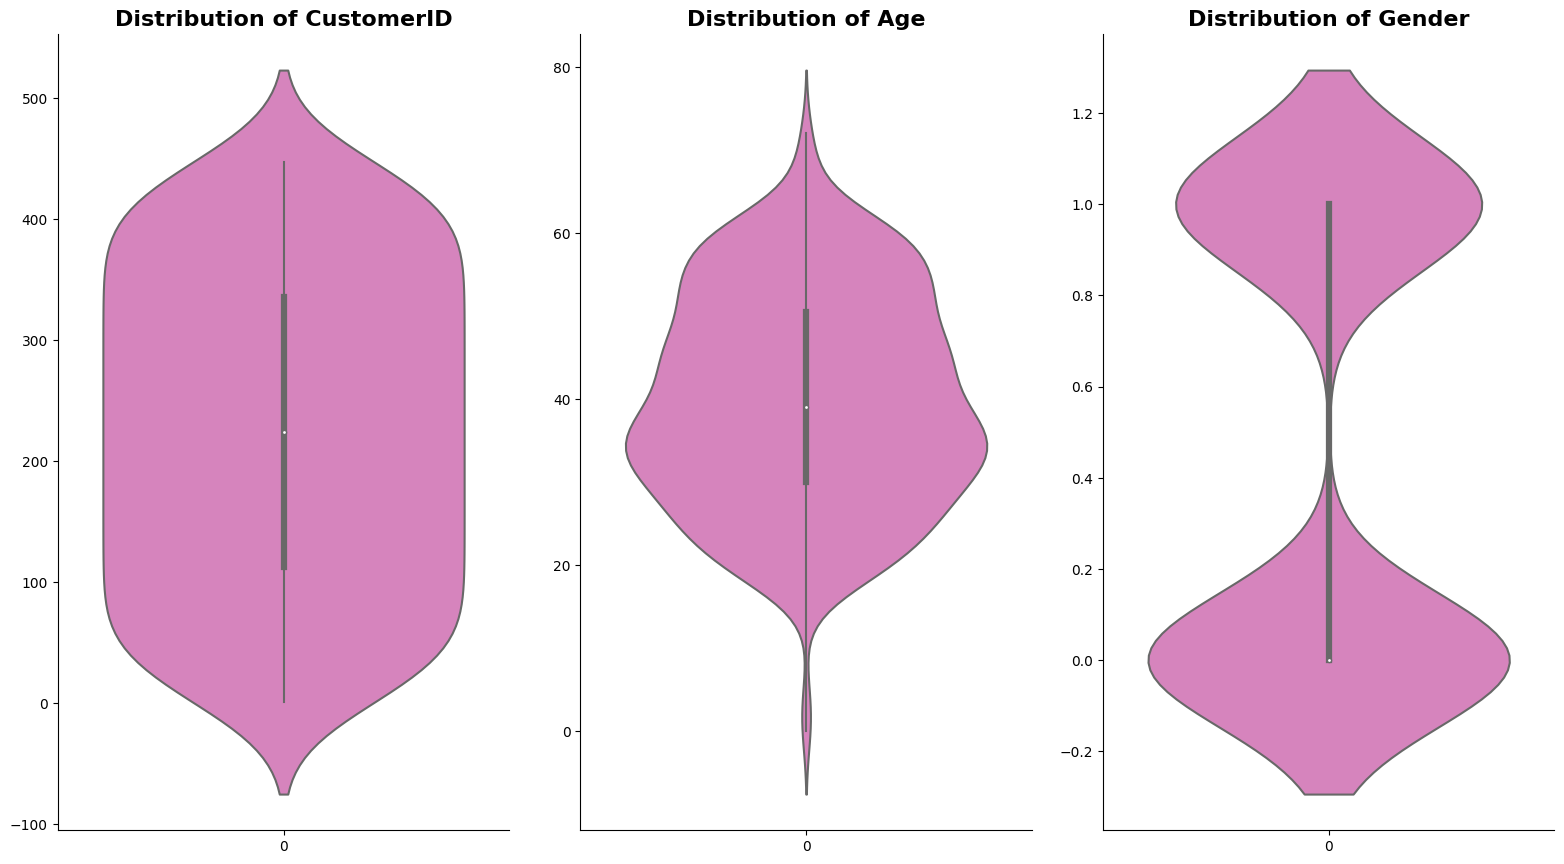

In [1324]:
plt.figure(figsize=(16, 9))
for i in range(0, len(num_cols)):
    plt.subplot(1, 3, i+1)
    sns.violinplot(df_c[num_cols[i]], color='tab:pink')
    sns.despine()
    plt.title(f'Distribution of {num_cols[i]}', fontsize=16, weight='bold')
    plt.tight_layout(pad=2)

plt.show()

In [1325]:
categorical_distribution(cat)

,Feature Name,Top most frequent class,Percentage (%)
0,Marital Status,Married,76.58
1,Income,0,3.58


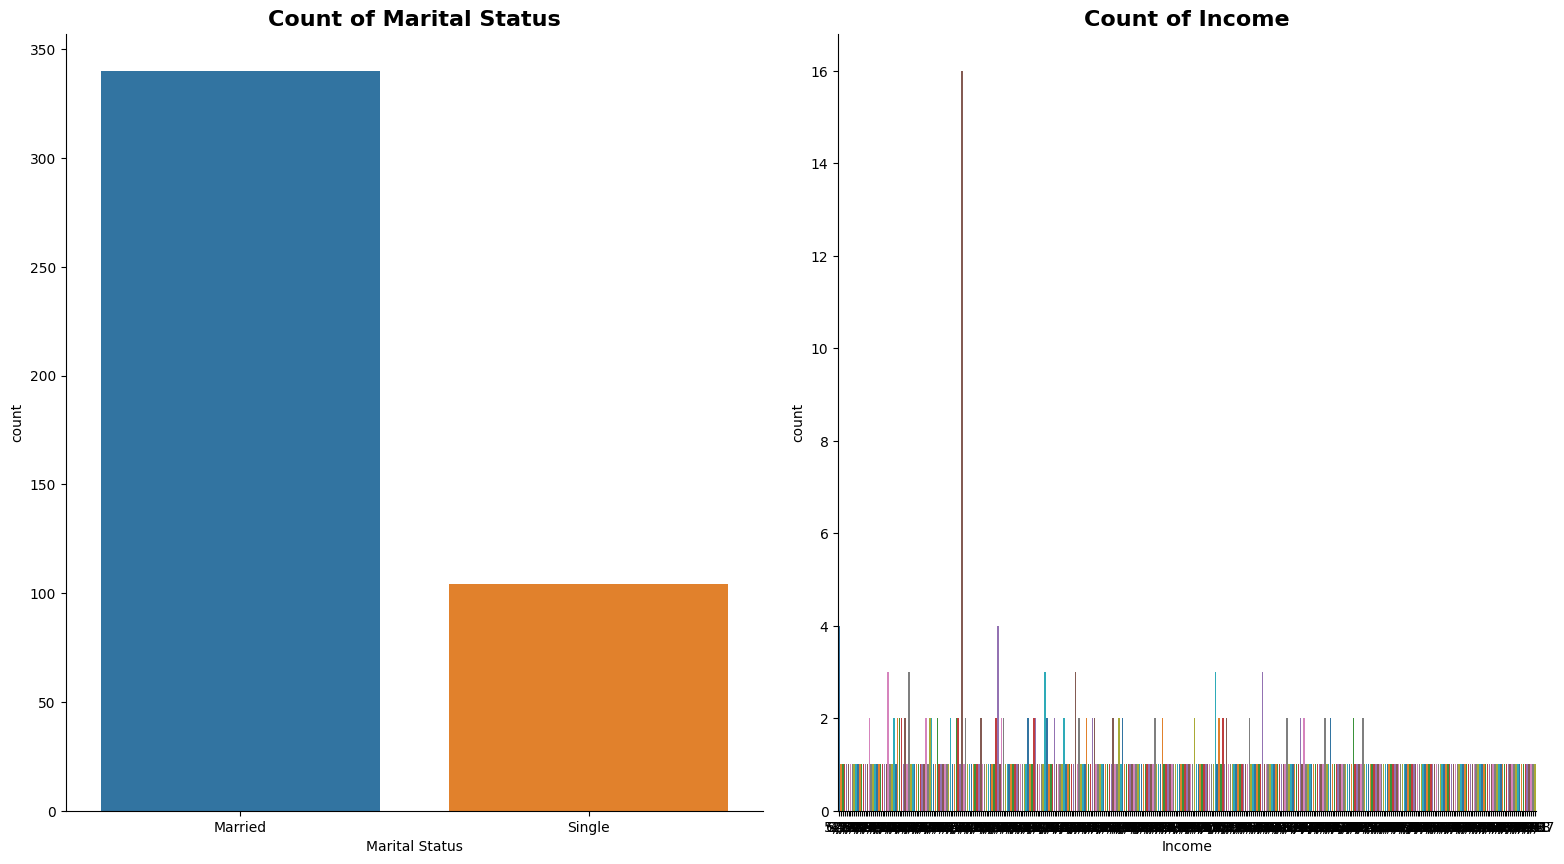

In [1326]:
plt.figure(figsize=(16, 9))
for i in range(0, len(cat_cols)):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=df_c[cat_cols[i]], palette='tab10')
    sns.despine()
    plt.title(f'Count of {cat_cols[i]}', fontsize=16, weight='bold')
    plt.tight_layout(pad=2)

plt.show()

🔽 `Age`

In [1327]:
df_c['Age'].describe()

count    447.000000
mean      39.782998
std       12.848719
min        0.000000
25%       30.000000
50%       39.000000
75%       50.500000
max       72.000000
Name: Age, dtype: float64

In [1328]:
df_c[df_c['Age'] < 18].sort_values(by='Age').reset_index(drop=True)

,CustomerID,Age,Gender,Marital Status,Income
0,128,0,1,Married,"6,77"
1,12,2,1,Married,"4,94"
2,74,3,1,Married,"5,09"


In [1329]:
df_c.loc[df_c['Age'] < 18, 'Age'] = df_c['Age'].mode()[0]
df_c['Age'].min()

18

🔽 `Gender`

In [1330]:
df_c['Gender'].value_counts(normalize=True).round(2)

Gender
0    0.54
1    0.46
Name: proportion, dtype: float64

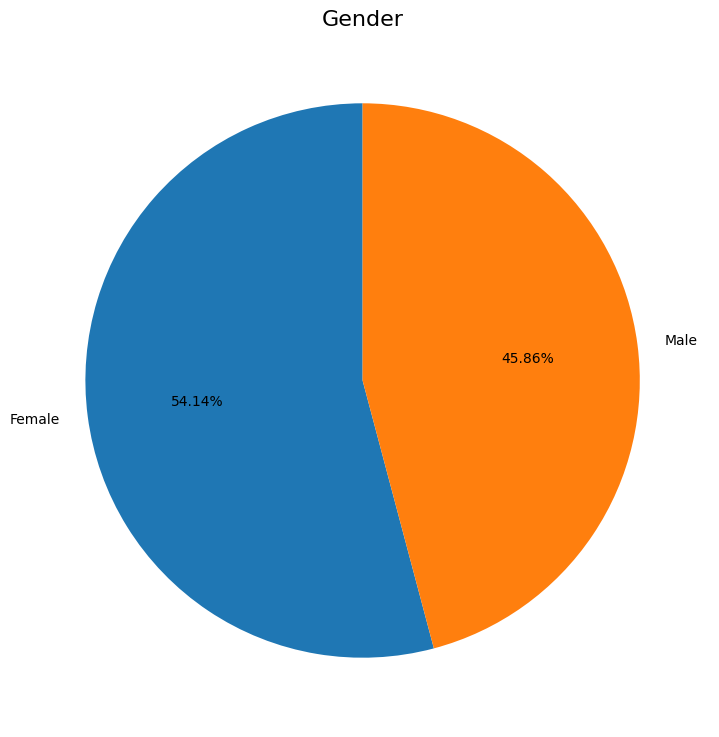

In [1331]:
gender_counts = df_c['Gender'].value_counts()

# Gender: binary (0 for female and 1 for male)
labels = {0: 'Female', 1: 'Male'}
gender_counts.index = gender_counts.index.map(labels)

plt.figure(figsize=(9, 9))
plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.2f%%',
        startangle=90)

plt.title('Gender', fontsize=16)

plt.show()

🔽 `Marital Status`

In [1332]:
# Rename feature
df_c.rename(columns={'Marital Status': 'MaritalStatus'}, inplace=True)
df_c['MaritalStatus'].value_counts(normalize=True).round(2)

MaritalStatus
Married    0.77
Single     0.23
Name: proportion, dtype: float64

In [1333]:
df_c['MaritalStatus'].unique()

array(['Married', nan, 'Single'], dtype=object)

In [1334]:
# Fill missing values with mode
df_c['MaritalStatus'].fillna(df_c['MaritalStatus'].mode()[0], inplace=True)
# df_c['MaritalStatus'].fillna('Married', inplace=True)

# Encode
df_c['MaritalStatus'] = df_c['MaritalStatus'].replace({'Single'  : 0, 'Married' : 1})
df_c['MaritalStatus'].unique()

array([1, 0], dtype=int64)

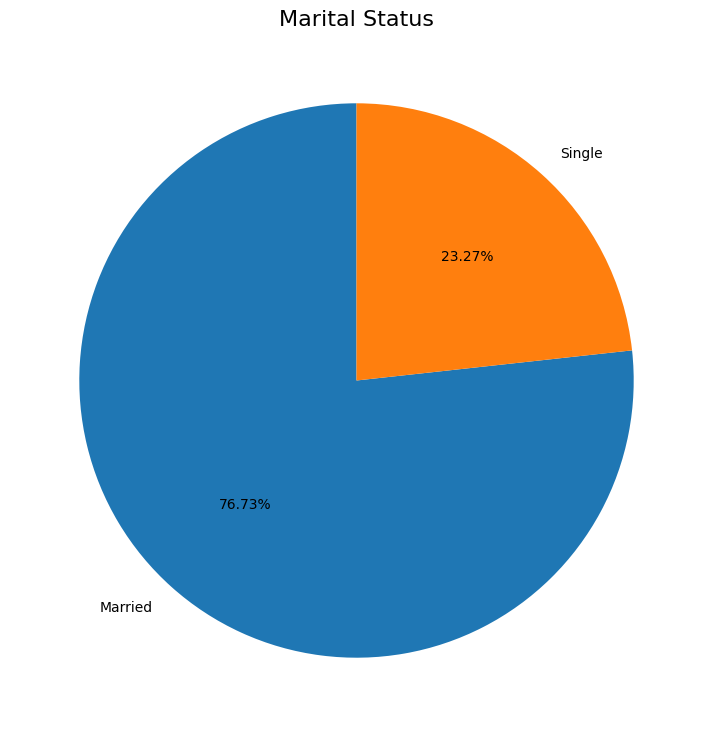

In [1335]:
status_counts = df_c['MaritalStatus'].value_counts()
labels = {0: 'Single', 1: 'Married'}
status_counts.index = status_counts.index.map(labels)

plt.figure(figsize=(9, 9))
plt.pie(status_counts,
        labels=status_counts.index,
        autopct='%1.2f%%',
        startangle=90)

plt.title('Marital Status', fontsize=16)

plt.show()

🔽 `Income`

In [1336]:
df_c['Income'].value_counts(normalize=True).round(3).head()

Income
0       0.036
5,12    0.009
9,57    0.009
6,05    0.007
6,19    0.007
Name: proportion, dtype: float64

In [1337]:
df_c[df_c['Income'] == '0'].sort_values(by='Age').reset_index(drop=True)

,CustomerID,Age,Gender,MaritalStatus,Income
0,164,18,1,0,0
1,226,18,0,0,0
2,252,18,1,0,0
3,366,18,0,0,0
4,405,18,0,0,0
5,412,18,1,0,0
6,67,19,0,0,0
7,283,19,1,0,0
8,329,19,1,0,0
9,355,19,1,0,0


In [1338]:
df_c[df_c['Income'] == '0']['Age'].sort_values().unique()

array([18, 19, 20, 21, 22], dtype=int64)

In [1339]:
# Fix dtype: object to integer
df_c['Income'] = df_c['Income'].str.replace(',', '.').astype(float)
df_c['Income'].sample(5)

380     6.92
395     9.18
30      9.61
66      0.00
112    71.30
Name: Income, dtype: float64

🔽 `Age Group`

In [1340]:
# Feature engineering
# Define the age bins and labels
bins = [0, 24, 34, 44, 54, 64, float('inf')]
labels = ['0 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '65 +']

# Create the 'AgeGroup' feature using pd.cut()
df_c['AgeGroup'] = pd.cut(df_c['Age'], bins=bins, labels=labels, right=False)
df_c[['Age', 'AgeGroup']].sample(5)

,Age,AgeGroup
134,41,35 - 44
430,40,35 - 44
306,31,25 - 34
174,60,55 - 64
45,36,35 - 44


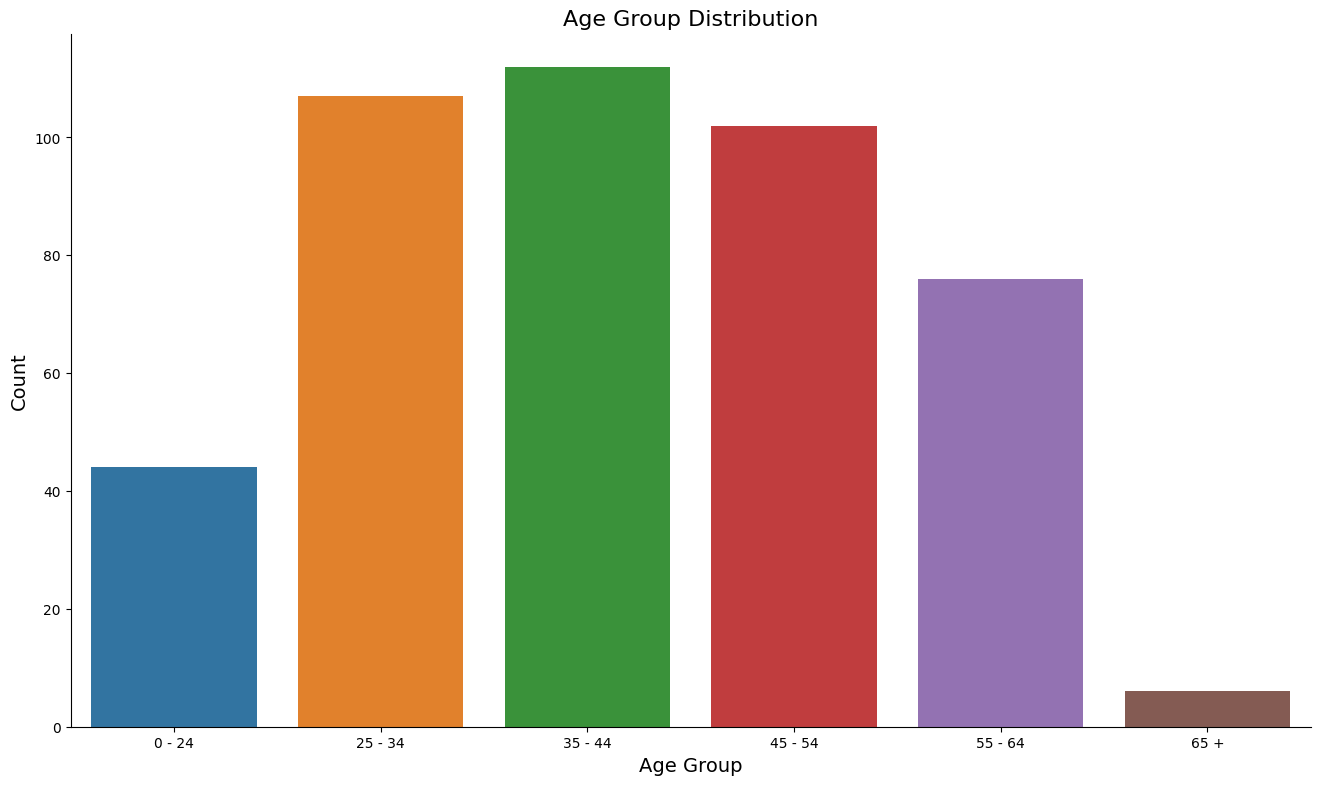

In [1341]:
plt.figure(figsize=(16, 9))

sns.countplot(data=df_c, x='AgeGroup', order=labels)
sns.despine()

plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Age Group Distribution', fontsize=16)

plt.show()

In [1342]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CustomerID     447 non-null    int64   
 1   Age            447 non-null    int64   
 2   Gender         447 non-null    int64   
 3   MaritalStatus  447 non-null    int64   
 4   Income         447 non-null    float64 
 5   AgeGroup       447 non-null    category
dtypes: category(1), float64(1), int64(4)
memory usage: 18.2 KB


✅ Setiap kolom telah memiliki tipe data yang sesuai.

### Product

In [1343]:
df_p = product.copy()
df_p.sample(5)

,ProductID,Product Name,Price
6,P7,Coffee Candy,9400
5,P6,Cashew,18000
3,P4,Potato Chip,12000
8,P9,Yoghurt,10000
2,P3,Crackers,7500


In [1344]:
df_p.shape

(10, 3)

In [1345]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [1346]:
df_p.duplicated().sum()

0

In [1347]:
df_p.isna().sum().sum()

0

In [1348]:
unique_values(df_p)

,Feature Name,Unique Classes
0,ProductID,"[P1, P2, P3, P4, P5, P6, P7, P8, P9, P10]"
1,Product Name,"[Choco Bar, Ginger Candy , Crackers, Potato Ch..."
2,Price,"[8800, 3200, 7500, 12000, 4200, 18000, 9400, 1..."


In [1349]:
df_p.describe(include='all')

,ProductID,Product Name,Price
count,10,10,10.000000
unique,10,10,NaN
top,P1,Choco Bar,NaN
freq,1,1,NaN
mean,NaN,NaN,10410.000000
std,NaN,NaN,4890.455557
min,NaN,NaN,3200.000000
25%,NaN,NaN,7825.000000
50%,NaN,NaN,9700.000000
75%,NaN,NaN,14250.000000


🔽 `Product Name`

In [1350]:
# Rename feature
df_p.rename(columns={'Product Name': 'ProductName'}, inplace=True)
df_p['ProductName'].unique()

array(['Choco Bar', 'Ginger Candy ', 'Crackers', 'Potato Chip',
       'Thai Tea', 'Cashew', 'Coffee Candy', 'Oat', 'Yoghurt',
       'Cheese Stick'], dtype=object)

In [1351]:
# Recheck
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    10 non-null     object
 1   ProductName  10 non-null     object
 2   Price        10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


✅ Setiap kolom telah memiliki tipe data yang sesuai.

### Store

In [1352]:
df_s = store.copy()
df_s

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"
5,6,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
6,7,Buana Indah,Buana,General Trade,"3,316694","114,590111"
7,8,Sinar Harapan,Harapan Baru,General Trade,"5,54829","95,323753"
8,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
9,10,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513"


In [1353]:
df_s.shape

(14, 6)

In [1354]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [1355]:
df_s.duplicated().sum()

0

In [1356]:
df_s.isna().sum().sum()

0

In [1357]:
unique_values(df_s)

,Feature Name,Unique Classes
0,StoreID,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]"
1,StoreName,"[Prima Tendean, Prima Kelapa Dua, Prima Kota, ..."
2,GroupStore,"[Prima, Gita, Lingga, Buana, Harapan Baru, Pre..."
3,Type,"[Modern Trade, General Trade]"
4,Latitude,"[-6,2, -6,914864, -7,797068, -6,966667, -7,250..."
5,Longitude,"[106,816666, 107,608238, 110,370529, 110,41666..."


In [1358]:
df_s.describe(include='all')

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
count,14.0000,14,14,14,14,14
unique,NaN,12,7,2,14,14
top,NaN,Lingga,Prima,General Trade,"-6,2","106,816666"
freq,NaN,2,3,8,1,1
mean,7.5000,NaN,NaN,NaN,NaN,NaN
std,4.1833,NaN,NaN,NaN,NaN,NaN
min,1.0000,NaN,NaN,NaN,NaN,NaN
25%,4.2500,NaN,NaN,NaN,NaN,NaN
50%,7.5000,NaN,NaN,NaN,NaN,NaN
75%,10.7500,NaN,NaN,NaN,NaN,NaN


🔽 `Group`

In [1359]:
# Rename feature
df_s.rename(columns={'GroupStore': 'Group'}, inplace=True)
df_s['Group'].unique()

array(['Prima', 'Gita', 'Lingga', 'Buana', 'Harapan Baru', 'Prestasi',
       'Priangan'], dtype=object)

🔽 `Type`

In [1360]:
df_s['Type'].value_counts(normalize=True).round(2)

Type
General Trade    0.57
Modern Trade     0.43
Name: proportion, dtype: float64

🔽 `Latitude` and `Longitude`

In [1361]:
# Remove commas from 'Latitude' and 'Longitude' features
df_s['Latitude'] = df_s['Latitude'].str.replace(',', '.').astype(float)
df_s['Longitude'] = df_s['Longitude'].str.replace(',', '.').astype(float)

# df_s[['Latitude', 'Longitude']] = df_s[['Latitude', 'Longitude']].astype(float)

In [1362]:
df_s[['StoreID', 'Latitude', 'Longitude']]

,StoreID,Latitude,Longitude
0,1,-6.200000,106.816666
1,2,-6.914864,107.608238
2,3,-7.797068,110.370529
3,4,-6.966667,110.416664
4,5,-7.250445,112.768845
5,6,-5.135399,119.423790
6,7,3.316694,114.590111
7,8,5.548290,95.323753
8,9,-3.654703,128.190643
9,10,3.597031,98.678513


In [1363]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StoreID    14 non-null     int64  
 1   StoreName  14 non-null     object 
 2   Group      14 non-null     object 
 3   Type       14 non-null     object 
 4   Latitude   14 non-null     float64
 5   Longitude  14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 800.0+ bytes


✅ Setiap kolom telah memiliki tipe data yang sesuai.

#### Create Interactive Map

##### Using `folium`

In [1364]:
# pip install folium

In [1365]:
import folium

# Initialize the map
map = folium.Map(location=[df_s['Latitude'].mean(), df_s['Longitude'].mean()], zoom_start=10)

# Add markers for each point
for index, row in df_s.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['StoreName'],  # Information displayed in the popup when the marker is clicked
        icon=folium.Icon(color='blue', icon='glyphicon-home')  # Change the marker icon to a home icon (glyphicon-home)
    ).add_to(map)

# Display the map
map

##### Using `plotly`

In [1366]:
import plotly.express as px

fig = px.scatter_mapbox(df_s, lat='Latitude', lon='Longitude', zoom=5)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

### Transaction

In [1367]:
df_t = transaction.copy()
df_t.sample(5)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
2027,TR89826,394,25/05/2022,P7,9400,2,18800,4
2322,TR86261,360,16/06/2022,P3,7500,3,22500,12
1720,TR95407,399,03/05/2022,P5,4200,3,12600,7
1742,TR88458,204,05/05/2022,P8,16000,2,32000,11
3087,TR81428,63,11/08/2022,P10,15000,3,45000,13


In [1368]:
df_t.shape

(5020, 8)

In [1369]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [1370]:
df_t.duplicated().sum()

0

In [1371]:
df_t.isna().sum().sum()

0

In [1372]:
unique_values(df_t)

,Feature Name,Unique Classes
0,TransactionID,"[TR11369, TR16356, TR1984, TR35256, TR41231, T..."
1,CustomerID,"[328, 165, 183, 160, 386, 283, 51, 49, 222, 27..."
2,Date,"[01/01/2022, 02/01/2022, 03/01/2022, 04/01/202..."
3,ProductID,"[P3, P9, P1, P10, P8, P5, P7, P4, P2, P6]"
4,Price,"[7500, 10000, 8800, 15000, 16000, 4200, 9400, ..."
5,Qty,"[4, 7, 1, 2, 3, 6, 5, 10, 8, 9]"
6,TotalAmount,"[30000, 70000, 35200, 61600, 10000, 15000, 320..."
7,StoreID,"[12, 1, 4, 5, 2, 13, 14, 10, 3, 6, 9, 7, 8, 11]"


In [1373]:
df_t.describe(include='all')

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
count,5020,5020.000000,5020,5020,5020.000000,5020.000000,5020.000000,5020.000000
unique,4908,NaN,365,10,NaN,NaN,NaN,NaN
top,TR71313,NaN,02/03/2022,P5,NaN,NaN,NaN,NaN
freq,3,NaN,31,814,NaN,NaN,NaN,NaN
mean,NaN,221.263745,NaN,NaN,9684.800797,3.644622,32279.482072,7.489841
std,NaN,129.672955,NaN,NaN,4600.708780,1.855295,19675.462455,4.028502
min,NaN,1.000000,NaN,NaN,3200.000000,1.000000,7500.000000,1.000000
25%,NaN,108.000000,NaN,NaN,4200.000000,2.000000,16000.000000,4.000000
50%,NaN,221.000000,NaN,NaN,9400.000000,3.000000,28200.000000,7.000000
75%,NaN,332.000000,NaN,NaN,15000.000000,5.000000,47000.000000,11.000000


🔽 `Quantity`

In [1374]:
# Rename feature
df_t.rename(columns={'Qty': 'Quantity'}, inplace=True)
df_t['Quantity'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

🔽 `Date`

In [1375]:
# Convert dtype to datetime
df_t['Date'] = pd.to_datetime(df_t['Date'], format='%d/%m/%Y')

🔽 `Month` and `Year`

In [1376]:
# Feature engineering
# df_t['Month'] = df_t['Date'].dt.strftime('%b')
df_t['Month'] = df_t['Date'].dt.month
df_t['Year'] = df_t['Date'].dt.year.astype(int)

df_t[['Date', 'Month', 'Year']].sample(5)

,Date,Month,Year
2930,2022-07-30,7,2022
3423,2022-09-06,9,2022
1594,2022-04-24,4,2022
2911,2022-07-28,7,2022
2879,2022-07-26,7,2022


In [1377]:
print('Bulan:', df_t['Month'].unique())
print('Tahun:', df_t['Year'].unique())

Bulan: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Tahun: [2022]


In [1378]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Quantity       5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
 8   Month          5020 non-null   int32         
 9   Year           5020 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(5), object(2)
memory usage: 353.1+ KB


✅ Setiap kolom telah memiliki tipe data yang sesuai.

## Merge the Dataset

In [1379]:
# Merge DataFrame
df_merged = df_t.merge(df_c, on='CustomerID', how='inner')
df_merged = df_merged.merge(df_p, on='ProductID', how='inner')
df_merged = df_merged.merge(df_s, on='StoreID', how='inner')

df_merged.rename(columns={'Price_x': 'Price'}, inplace=True)
columns = ['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'Income',
           'ProductID', 'ProductName', 'Price', 
           'StoreID', 'StoreName', 'Group', 'Type', 'Latitude', 'Longitude',
           'TransactionID', 'Date', 'Quantity', 'TotalAmount']

df_merged = df_merged[columns]
df_merged.head()

,CustomerID,Age,Gender,MaritalStatus,Income,ProductID,ProductName,Price,StoreID,StoreName,Group,Type,Latitude,Longitude,TransactionID,Date,Quantity,TotalAmount
0,328,36,0,1,10.53,P3,Crackers,7500,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,TR11369,2022-01-01,4,30000
1,183,27,1,0,0.18,P3,Crackers,7500,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,TR89318,2022-07-17,1,7500
2,123,34,0,1,4.36,P3,Crackers,7500,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,TR9106,2022-09-26,4,30000
3,335,29,1,0,4.74,P3,Crackers,7500,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,TR4331,2022-01-08,3,22500
4,181,33,1,1,9.94,P3,Crackers,7500,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,TR6445,2022-01-10,4,30000


In [1380]:
df_merged.dtypes

CustomerID                int64
Age                       int64
Gender                    int64
MaritalStatus             int64
Income                  float64
ProductID                object
ProductName              object
Price                     int64
StoreID                   int64
StoreName                object
Group                    object
Type                     object
Latitude                float64
Longitude               float64
TransactionID            object
Date             datetime64[ns]
Quantity                  int64
TotalAmount               int64
dtype: object

## Export the Dataset

In [1381]:
df_merged.to_csv('Cleaned_Data.csv', index=False)